In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [11]:
classes = np.unique(y_train)
print(f"Number of classes are: {classes.size}")
print(f"Classes are: {classes}")

NameError: name 'y_train' is not defined

In [5]:
dim1 = x_train.shape[1]
dim2 = x_train.shape[2]
print(f"Dimensions of the images are: {dim1}x{dim2}")

Dimensions of the images are: 28x28


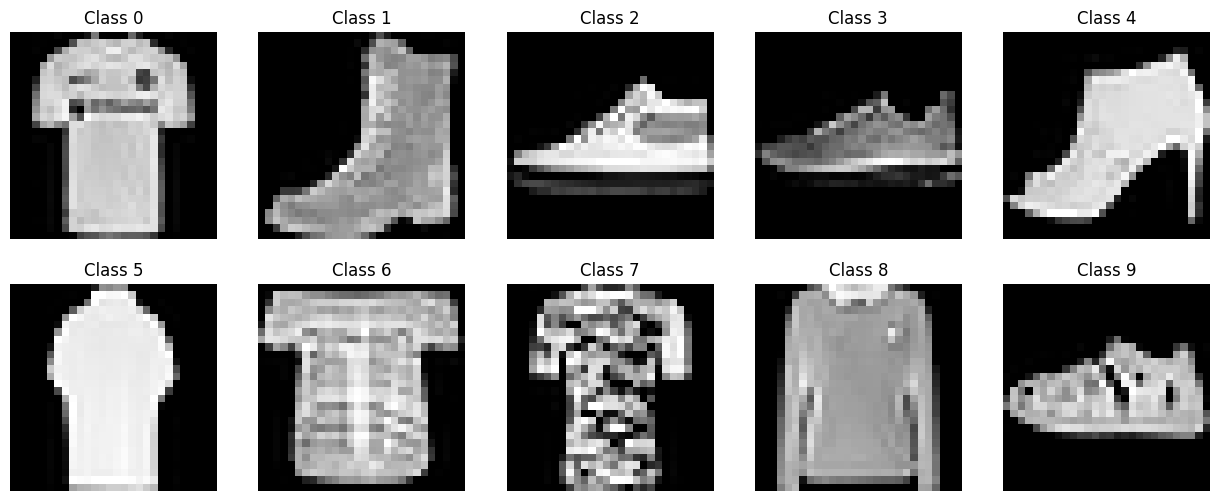

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
plt.subplots_adjust(0.1)

for i in classes:
    ax = plt.subplot(2, 5, i+1)
    while True:
        rand_img = random.randint(y_test.shape[0])
        if (y_test[rand_img] == i):
            ax.imshow(x_train[rand_img], cmap='gray')
            ax.set_title(f"Class {i}")
            ax.axis('off')
            break
            
plt.show()

In [7]:
minVal = np.min(x_train[rand_img])
maxVal = np.max(x_train[rand_img])
print(f"Min and max values of pixels are: {minVal} and {maxVal}")

Min and max values of pixels are: 0 and 255


In [8]:
x_train = x_train/float(maxVal)
x_test = x_test/float(maxVal)

In [18]:
model = Sequential([
    Flatten(input_shape=[dim1, dim2], name="input"),
    Dense(64, activation="relu", name="hidden1"),
    Dense(16, activation="relu", name="hidden2"),
    Dense(classes.size, activation="softmax", name="output")
])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 64)                50240     
                                                                 
 hidden2 (Dense)             (None, 16)                1040      
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 51450 (200.98 KB)
Trainable params: 51450 (200.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
optimizer =  Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
epochs = 20
batch_size = 128
h = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.6686 - accuracy: 0.7719 - val_loss: 0.4625 - val_accuracy: 0.8297
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4410 - accuracy: 0.8474 - val_loss: 0.4178 - val_accuracy: 0.8453
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3998 - accuracy: 0.8594 - val_loss: 0.4007 - val_accuracy: 0.8543
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3726 - accuracy: 0.8677 - val_loss: 0.3840 - val_accuracy: 0.8600
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.8741 - val_loss: 0.3679 - val_accuracy: 0.8690
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8795 - val_loss: 0.3561 - val_accuracy: 0.8683
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3265 - accuracy: 0.8820 - val_loss: 0.3595 - val_accuracy: 0.8747
Epoch 